In [114]:
#Imports and function definitions

import numpy as np
import matplotlib.pyplot as plt

def f(t,a):
    return np.exp(-1*a*t)

def f_forward(tmax,a,dt):
    #y(0) = 1
    t_i = 0
    y = []
    t = []
    while t_i <= tmax:
        if len(y) == 0:
            ynext = 1
        else:
            ynext = y[-1] * (1-a*dt)
        y.append(ynext)
        t.append(t_i)
        t_i += dt
    return t,y

def f_backward(tmax,a,dt):
    #y(0) = 1
    t_i = 0
    y = []
    t = []
    while t_i <= tmax:
        if len(y) == 0:
            ynext = 1
        else:
            ynext = y[-1] * (1/(1+a*dt))
        y.append(ynext)
        t.append(t_i)
        t_i += dt
    return t,y

def f_trapezoid(tmax,a,dt):
    #y(0) = 1
    t_i = 0
    y = []
    t = []
    while t_i <= tmax:
        if len(y) == 0:
            ynext = 1
        else:
            ynext = y[-1] * ((1-a*dt/2)/(1+a*dt/2))
        y.append(ynext)
        t.append(t_i)
        t_i += dt
    return t,y

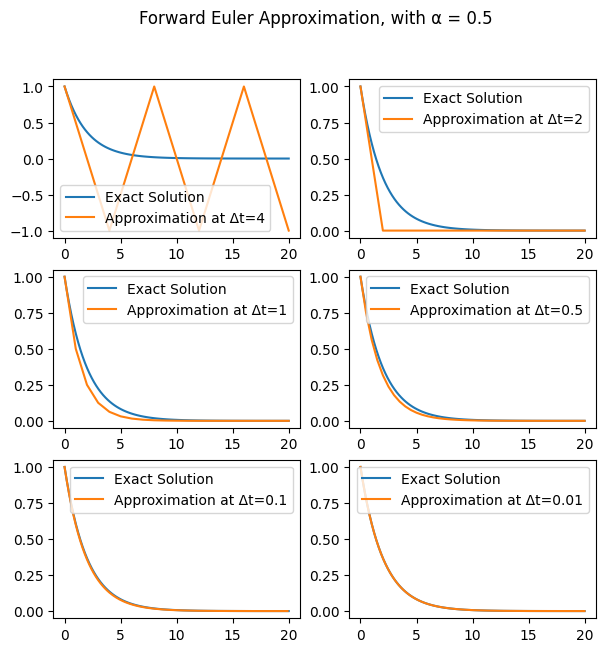

In [111]:
#Forward Euler: choose an α and range of Δt's that includes both stable and unstable values
#(Remember, αΔt ≤ 2)
#Find the numerical solution using Forward Euler
#Plot the numerical to exact solution for each Δt
#y(t+Δt) = y(t) + Δt(-αy(t)), where y(t) = e^(-αt)

t = np.linspace(0,20,100)
tmax = t[-1]
a = 0.5
dt_l = [4,2,1,0.5,0.1,0.01]

y = f(t,a)
fig_forward = plt.figure(figsize=(7,7))
fig_forward.suptitle("Forward Euler Approximation, with α = 0.5")
ax = fig_forward.subplots(3,2)

for i in range(len(dt_l)):
    dt = dt_l[i]
    (t_l,y_l) = f_forward(tmax,a,dt)
    ax_i = ax[int((i-i%2)/2)][int(i%2)]
    ax_i.plot(t,y)
    ax_i.plot(t_l,y_l)
    ax_i.legend(["Exact Solution", ("Approximation at Δt="+str(dt))])

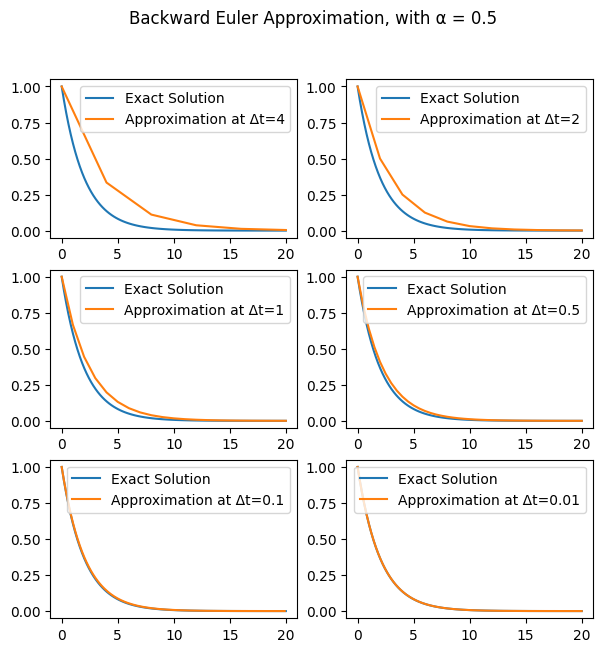

In [113]:
#Backward Euler: plot for the same α and range of Δt's
#Find the numerical solution using Backward Euler
#Plot the numerical to exact solution for each Δt
#y(t+Δt) = 1/(1+αΔt)(y(t)), where y(t) = e^(-αt)

fig_backward = plt.figure(figsize=(7,7))
fig_backward.suptitle("Backward Euler Approximation, with α = 0.5")
ax = fig_backward.subplots(3,2)

for i in range(len(dt_l)):
    dt = dt_l[i]
    (t_l,y_l) = f_backward(tmax,a,dt)
    ax_i = ax[int((i-i%2)/2)][int(i%2)]
    ax_i.plot(t,y)
    ax_i.plot(t_l,y_l)
    ax_i.legend(["Exact Solution", ("Approximation at Δt="+str(dt))])

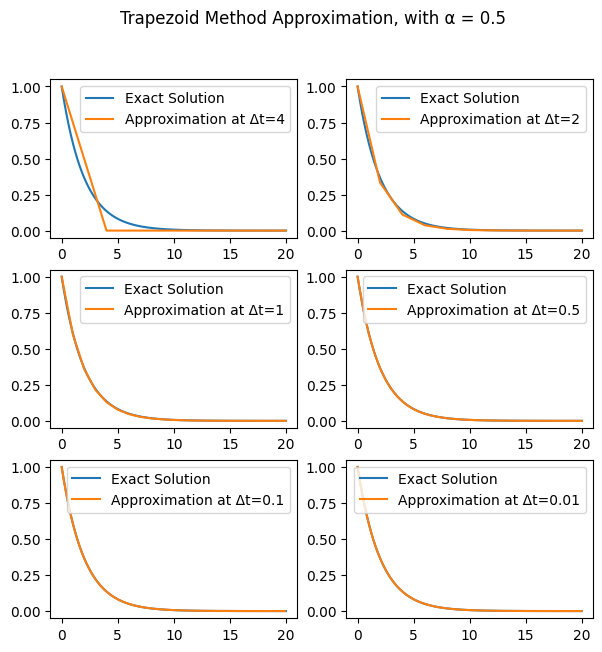

In [115]:
#Trapezoid Method: plot for the same α and range of Δt's
#Find the numerical solution using Trapezoid Method
#Plot the numerical to exact solution for each Δt
#y(t+Δt) = ((1-αΔt/2)/(1+αΔt/2))(y(t), where y(t) = e^(-αt)

fig_trapezoid = plt.figure(figsize=(7,7))
fig_trapezoid.suptitle("Trapezoid Method Approximation, with α = 0.5")
ax = fig_trapezoid.subplots(3,2)

for i in range(len(dt_l)):
    dt = dt_l[i]
    (t_l,y_l) = f_trapezoid(tmax,a,dt)
    ax_i = ax[int((i-i%2)/2)][int(i%2)]
    ax_i.plot(t,y)
    ax_i.plot(t_l,y_l)
    ax_i.legend(["Exact Solution", ("Approximation at Δt="+str(dt))])